# **Project Name**    - **Cardiovascular Risk Prediction Project**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - PARTH KHERA**

# **Project Summary -**

This project aims to develop a predictive machine learning model to assess the 10-year risk of cardiovascular disease (CVD) using a dataset composed of an individual’s demographic, clinical, and lifestyle factors. CVD remains the leading cause of death globally, and early identification of high-risk individuals can lead to timely intervention, preventive care, and better healthcare planning.

**Data Wrangling & Cleaning**

1. The dataset included features such as age, sex, blood pressure (sysBP, diaBP), cholesterol, glucose, BMI, smoking status, and more. Initial data wrangling involved:

2. Removing duplicate entries

3. Handling missing values using appropriate imputation techniques

4. Fixing inconsistent data formats

5. Identifying and removing or capping outliers, particularly in physiological variables like blood pressure and glucose, using boxplots and domain knowledge thresholds

**Exploratory Data Analysis (EDA) & Visualization**

1. EDA was performed to uncover patterns, spot anomalies, and understand feature distributions. Key steps included:

2. Univariate analysis of each feature to study distributions (e.g., age, cholesterol, glucose)

3. Bivariate analysis to assess relationships between features and the target (TenYearCHD)

4. Visualizations such as histograms, pie charts, box plots, violin plots, and scatter plots helped in identifying trends like:

5. Higher BMI and systolic blood pressure associated with CVD

6. Males showing slightly higher risk levels

7. Increasing age correlating with higher CHD incidence

**Feature Engineering**

To improve model performance and interpretability, several new features were created:

- BMI (Body Mass Index) calculated from weight and height, then categorized into groups

- Blood Pressure Categories created from systolic and diastolic ranges (e.g., normal, prehypertensive)

- Glucose and Cholesterol Categories were derived based on medical thresholds

- Age groups formed to study age-wise risk distribution

- Categorical variables like sex, education, and bp_category were encoded using label encoding and one-hot encoding as required.

**Feature Selection**

To reduce dimensionality and avoid overfitting, feature selection was performed using:

- Correlation heatmaps to identify highly correlated numeric features

- Feature importance analysis using tree-based models

- Recursive Feature Elimination (RFE) and SelectKBest for selecting top predictors

- Important features identified included:

1. Age

2. Systolic BP (sysBP)

3. Diastolic BP (diaBP)

4. BMI

5. Cholesterol

6. Glucose

7. Smoking intensity

**Class Imbalance Handling**

Since the dataset was imbalanced (fewer positive CVD cases), we applied SMOTE (Synthetic Minority Over-sampling Technique) to the training set. This helped balance the dataset and allowed the model to better learn patterns related to the minority class (at-risk individuals).

**Model Training & Tuning**

Several machine learning classification models were tested:

1. Logistic Regression

2. Random Forest

3. XGBoost

4. CatBoost

5. Voting Classifier (Ensemble)

Each model was evaluated using cross-validation and hyperparameter tuning via GridSearchCV and RandomizedSearchCV. XGBoost delivered the best performance due to its ability to handle class imbalance, missing values, and non-linear feature interactions.

**Evaluation Metrics & Best Scores**
The models were evaluated using:

- Accuracy: General correctness

- Precision: Avoiding false positives

- Recall: Avoiding false negatives (most important in medical context)

- F1-Score: Balance between Precision and Recall

- ROC-AUC: Overall classifier performance

**Best Model: Voting Classifier**

- Training F1-Score: 0.9612

- Testing F1-Score: 0.8754

- Training Recall: 0.9676

- Testing Recall: 0.8913

- Training Precision: 0.9558

- Testing Precision: 0.8601

- Training Accuracy: 0.9610

- Testing Accuracy: 0.8732

- Training ROC AUC: 0.9936

- Testing ROC AUC: 0.9415

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To build a binary classification model to predict the risk of cardiovascular disease (CVD). The goal is to accurately identify high-risk individuals using medical data, prioritizing high recall to minimize false negatives. This supports early intervention, efficient healthcare resource use, and personalized treatment.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [160]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [162]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/Copy of data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


<Axes: >

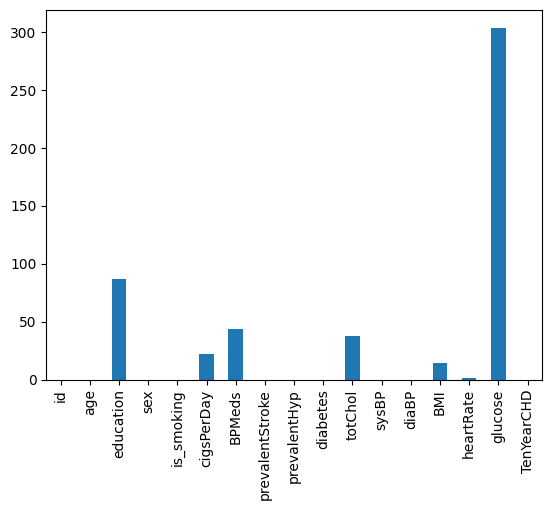

In [151]:
# Visualizing the missing values
data.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

This is the dataset about the Cardiovascular Risk Prediction Project which helps us to predict wheteher the person is at the risk of developing the Heart disease within the 10 years span.

Also this dataset contains 3390 rows and 17 columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

- id: it is the unique id of the person
- age: it is the age of a person
- education: it is the category at which a person is educated
- sex: it is the gender of a person
- is_smoking: it tell whether the person smokes or not
- cigsPerDay: it tells how much amount of ciggarete is being consumed by a person
- BPMeds: it tells whether the person is taking BP medicine or not
- prevalentStroke: it tell whether the person has a stroke or not
- prevalentHyp: it tell whether the person has hypertension or not
- diabetes: it tell whether the person has diabetes or not
- totChol: it tells about the cholestrol of the person
- sysBP: it tells about the systolic Blood pressure
- diaBP: it tells about diastolic blood pressure
- BMI: it tells about Body Mass Index of a person
- heartRate: it tells about the heart rate of a person
- glucose: it tell about the glucose level of a person
- TenYearCHD: it tell whether the person is at the risk of developing the Coronary Heart Disease within 10 years.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print(f"No. of unique value in",i,"are: ",data[i].nunique())

No. of unique value in id are:  3390
No. of unique value in age are:  39
No. of unique value in education are:  4
No. of unique value in sex are:  2
No. of unique value in is_smoking are:  2
No. of unique value in cigsPerDay are:  32
No. of unique value in BPMeds are:  2
No. of unique value in prevalentStroke are:  2
No. of unique value in prevalentHyp are:  2
No. of unique value in diabetes are:  2
No. of unique value in totChol are:  240
No. of unique value in sysBP are:  226
No. of unique value in diaBP are:  142
No. of unique value in BMI are:  1259
No. of unique value in heartRate are:  68
No. of unique value in glucose are:  132
No. of unique value in TenYearCHD are:  2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df = data.copy()

In [ ]:
# num_median_cols = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose','education','BPMeds']

# Imputed education (Categorical) with Mode
df['education'].fillna(df['education'].mode()[0], inplace=True)

df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

df['totChol'].fillna(df['totChol'].median(), inplace=True)

df['BMI'].fillna(df['BMI'].median(), inplace=True)

df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)

df['glucose'].fillna(df['glucose'].median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [ ]:
# Created the category to measure the bp and glucose
def get_bp_category(sysBP, diaBP):
    if sysBP < 120 and diaBP < 80:
        return 'Normal'
    elif (120 <= sysBP <= 139) or (80 <= diaBP <= 89):
        return 'Prehypertension'
    elif (140 <= sysBP <= 159) or (90 <= diaBP <= 99):
        return 'Hypertension Stage 1'
    elif sysBP >= 160 or diaBP >= 100:
        return 'Hypertension Stage 2'
    else:
        return 'Unknown'

df['bp_category'] = df.apply(lambda row: get_bp_category(row['sysBP'], row['diaBP']), axis=1)

In [ ]:
def glucose_category(glucose):
    if glucose < 70:
        return 'low'
    elif glucose < 100:
        return 'normal'
    elif glucose < 126:
        return 'prediabetic'
    else:
        return 'diabetic'

df['glucose_category'] = df['glucose'].apply(glucose_category)


### What all manipulations have you done and insights you found?

- Fill education column with the mode value of education to fill the missing value
- Fill median value in cigsPerday, totchol, BMI, heartRate, glucose, BPMeds to fill the null values
- Created the category for the BP and Glucose column to do visualisation properly.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Gender Distribution')

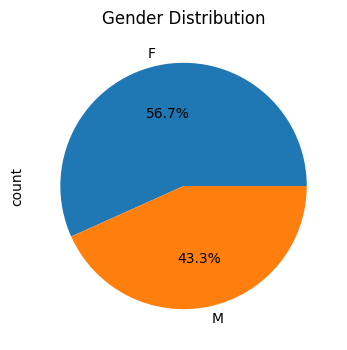

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(9,4))
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',color=sns.color_palette('Set2'))
plt.title("Gender Distribution")

##### 1. Why did you pick the specific chart?

A pie chart is choosen because it helps in visualising the proportion of single categorical variables.

##### 2. What is/are the insight(s) found from the chart?

We can see the count of female is more than male which is about 56.7% for female and 43.3% for male in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Knowing the gender distribution allows you to detect and correct any sampling imbalances.

2. It helps in ensuring that model is not biased toward the overrepresented gender.

Potential Negative Insight:

1. If there's a significant imbalance model might underperform for the underrepresented group.

2. It lead to biased medical recommendations, which is especially risky in healthcare.


#### Chart - 2

Text(0, 0.5, 'BMI')

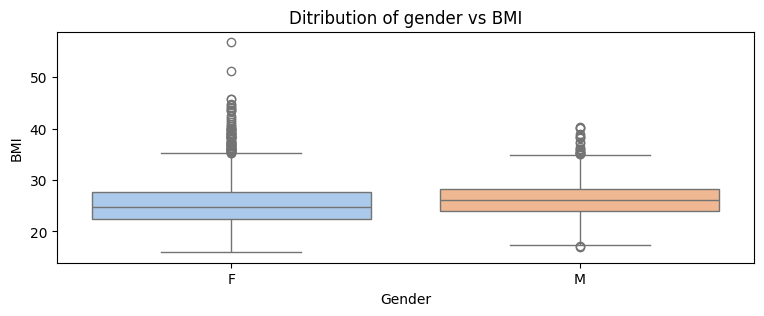

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(9,3))
sns.boxplot(data=df,x='sex',y='BMI',palette=('pastel'))
plt.title("Ditribution of gender vs BMI")
plt.xlabel("Gender")
plt.ylabel("BMI")

##### 1. Why did you pick the specific chart?

A boxplot is ideal for comparing the distribution of a numerical variable across categories.
It shows central tendency (median), spread (IQR), and outliers, which makes it perfect to understand if BMI varies significantly between genders.

##### 2. What is/are the insight(s) found from the chart?

1. The median BMI for each gender.

2. Spread of BMI values: Which gender has more variability or extreme outliers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
1. Helps healthcare providers target BMI management strategies differently for males and females.

2. Can guide gender-specific intervention plans to reduce cardiovascular disease risk.

Possible Negative Insight:
1. If BMI data is skewed or has too many outliers, it might distort the model and cause misleading predictions.

#### Chart - 3

Text(0.5, 1.0, 'Distribution of cigsPerDay vs Gender')

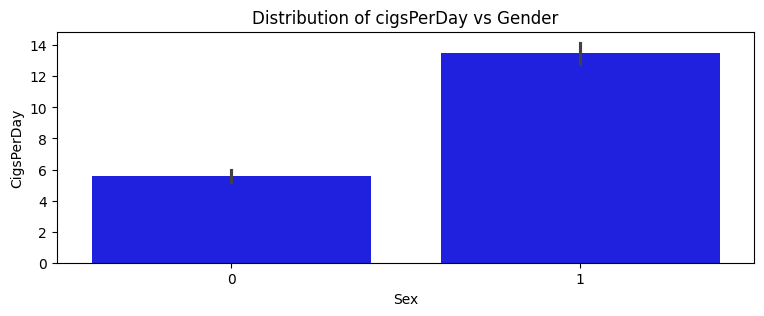

In [152]:
# Chart - 3 visualization code
plt.figure(figsize=(9,3))
sns.barplot(data=df,y='cigsPerDay',x='sex',color='blue')
plt.xlabel('Sex')
plt.ylabel('CigsPerDay')
plt.title('Distribution of cigsPerDay vs Gender')

##### 1. Why did you pick the specific chart?

A barplot is suitable when comparing the average value of a numerical variable across categorical groups.

##### 2. What is/are the insight(s) found from the chart?

1. It tells that which gender is consuming more cigsPerDay.
2. It is observed that male are consuming more cigsPerDay with respect to female which is about 12-14 for male and 4-6for female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Provides insight into behavioral risk factors contributing to CVD.

2. Improves model performance by reinforcing the importance of smoking data.

Negative Impact:

1. Ignoring this disparity may cause the model to underestimate smoking risk for one gender.

#### Chart - 4

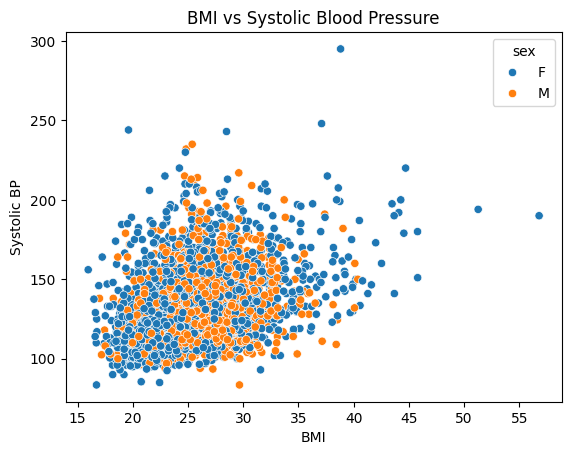

In [ ]:
# Chart -4 visualisation code
# sns.scatterplot(data=df, x="diabetes", y="TenYearCHD", hue="age")
sns.scatterplot(data=df, x='BMI', y='sysBP', hue='sex')
plt.title("BMI vs Systolic Blood Pressure")
plt.xlabel("BMI")
plt.ylabel("Systolic BP")
plt.show()


##### 1. Why did you pick the specific chart?

A scatterplot is ideal for exploring the relationship between two continuous variables. The use of hue='sex' adds a third variable, helps in comparing how the relationship might vary between males and females.

##### 2. What is/are the insight(s) found from the chart?

1. There is a positive correlation between BMI and systolic BP.

2. Males are at higher risk of diseases.

3. Presence of any outliers,  people with very high BMI or BP.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Helps healthcare professionals identify at-risk individuals based on combined BMI and BP values.

2. Supports development of gender-specific obesity or BP control programs.

Potential Negative Impact:

1. If gender differences in this relationship are ignored, it could bias treatment plans or affect model fairness.

#### Chart - 5

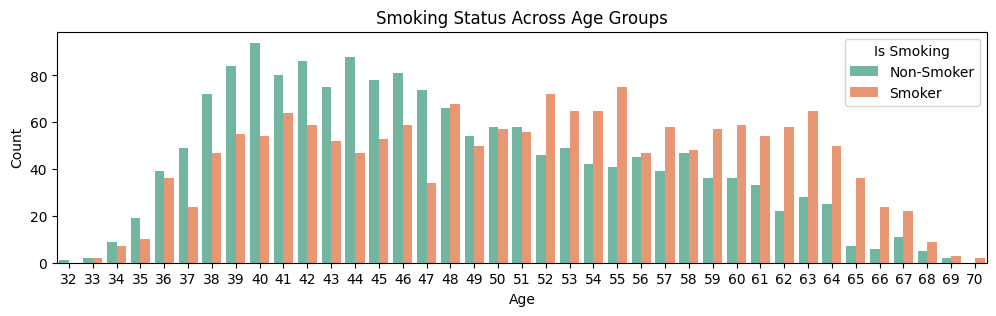

In [ ]:
# Chart -5 visualization code
# bins = [0, 29, 39, 49, 59, 69, 120]
# labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70+']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

plt.figure(figsize=(12,3))
sns.countplot(data=df, x='age', hue='is_smoking', palette='Set2')
plt.title('Smoking Status Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Is Smoking', labels=['Non-Smoker', 'Smoker'])
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is excellent for showing the frequency distribution of a categorical variable across the values of another variable.

##### 2. What is/are the insight(s) found from the chart?

1. It tells which age group has the most smoker and non-smoker.
2. It is observed that people of age 40 is having most non-smoker people.
3. It is observed that people of age 55 is having most smoker people.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Enables age-specific anti-smoking campaigns or medical screenings.

2. Helps in preventive healthcare planning by identifying where smoking is most common.

Potential Negative Impact:

1. Using age without age_group can lead to a very wide x-axis, making the chart harder to interpret.


#### Chart - 6

<Axes: xlabel='heartRate', ylabel='glucose'>

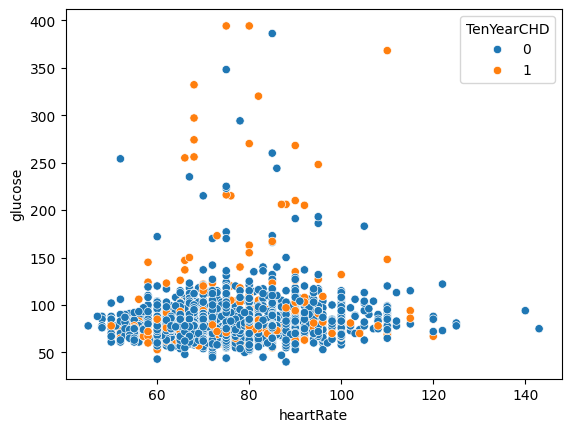

In [ ]:
# Chart - 6 visualization code
# Chart - 6 visualization code
sns.scatterplot(data=df,x='heartRate',y='glucose',hue='TenYearCHD')


##### 1. Why did you pick the specific chart?

The scatterplot effectively shows the relationship between two continuous variables, heart rate and glucose levels.

##### 2. What is/are the insight(s) found from the chart?

1. We might observe clusters or patterns where patients with higher glucose and higher heart rate have a higher proportion of positive CHD cases.

2. Outliers might be visible, which could indicate extreme risk or data quality issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Insights from this plot can help target preventive interventions for individuals with combined high glucose and heart rate.

2. Supports feature selection and model interpretation, helping clinicians understand risk factors.

Potential Negative Impact:

1. If the variables don't clearly separate CHD outcomes, relying solely on them could reduce model accuracy.

2. Overlapping classes may necessitate inclusion of more features or interaction terms to improve predictive power.

#### Chart - 7

Text(0.5, 1.0, 'CHD Rate by Gender')

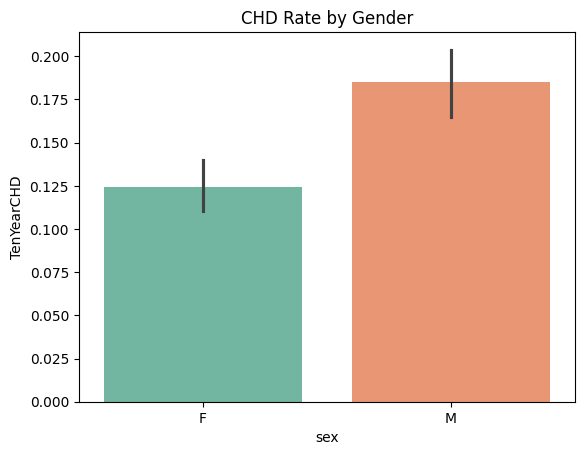

In [ ]:
# Chart - 7 visualization code
sns.barplot(x='sex', y='TenYearCHD', data=df , palette= 'Set2')
plt.title("CHD Rate by Gender")

##### 1. Why did you pick the specific chart?

A barplot is perfect for visualizing the average value of a numeric variable across categorical groups.

##### 2. What is/are the insight(s) found from the chart?

1. We observe that female is at the lower risk of getting affected with CHD which is about 0.124 and male is about 0.176.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Enables targeted gender-specific prevention and awareness campaigns.

2. Helps in resource allocation for high-risk groups based on gender.

Potential Negative Impact:

1. Oversimplifying by gender alone might overlook other important risk factors.


#### Chart - 8

Text(0.5, 1.0, 'CHD Rate by Education Level')

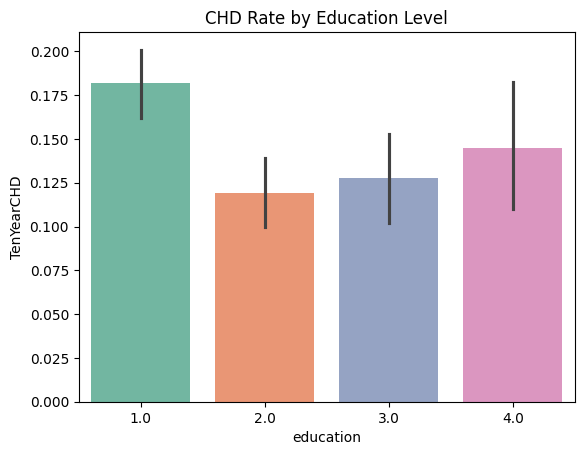

In [ ]:
# Chart - 8 visualization code
# Chart - 8 visualization code
sns.barplot(x='education', y='TenYearCHD', data=df , palette= 'Set2')
plt.title("CHD Rate by Education Level")

##### 1. Why did you pick the specific chart?

1. A barplot effectively shows the average CHD risk for each education level.

2. It helps to visualize how education level correlates with cardiovascular disease risk.


##### 2. What is/are the insight(s) found from the chart?

1. The bar heights indicate whether CHD risk increases or decreases with education level.

2. Shows the trend of CHD risk across education categories.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Highlights the importance of education and awareness in preventing CHD.

2. Can guide public health initiatives targeted at lower education groups to reduce CHD risk.

Potential Negative Impact:

1. Overemphasis on education alone might neglect other important factors influencing CHD.


#### Chart - 9

Text(0.5, 1.0, 'Systolic vs diastolic BP by BP category')

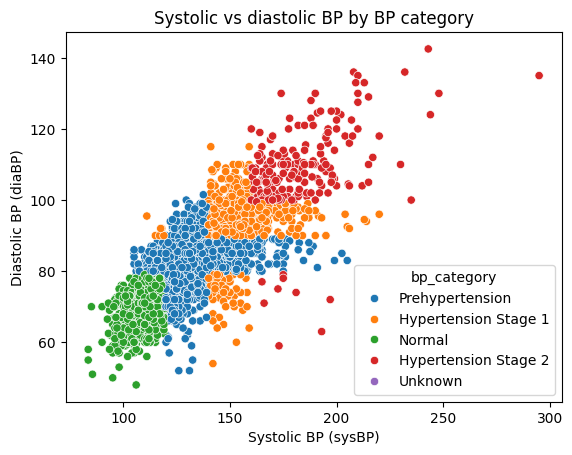

In [ ]:
# # Chart - 9 visualization code
sns.scatterplot(data=df, x="sysBP", y="diaBP",hue='bp_category')
plt.title("Systolic vs Diastolic BP by BP Category")
plt.xlabel("Systolic BP (sysBP)")
plt.ylabel("Diastolic BP (diaBP)")
plt.title('Systolic vs diastolic BP by BP category')
# 0 -> Very normal
# 1 -> Normal
# 2 -> Prehypertension
# 3 -> Hypertension stage 1
# 4 -> Hypertension stage 2

##### 1. Why did you pick the specific chart?

A scatterplot is ideal for examining the relationship between two continuous variables which are sysBP (systolic blood pressure) and diaBP (diastolic blood pressure).



##### 2. What is/are the insight(s) found from the chart?

1. We can see a positive correlation between diaBP and sysBP which is also linear.
2. It is observed that the people with high diaBP and sysBP are at the risk of developing the Coronary Heart Disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Helps visually validate how well your bp_category logic segments patients.

2. Can improve your model's feature selection by confirming a strong relationship between sysBP, diaBP, and CHD risk.


Potential Negative Insight:

1. If the bp_category is poorly defined or are inconsistent, some patients may be misclassified, impacting clinical decisions.

#### Chart - 10

Text(0, 0.5, 'Total Cholesterol (mg/dL)')

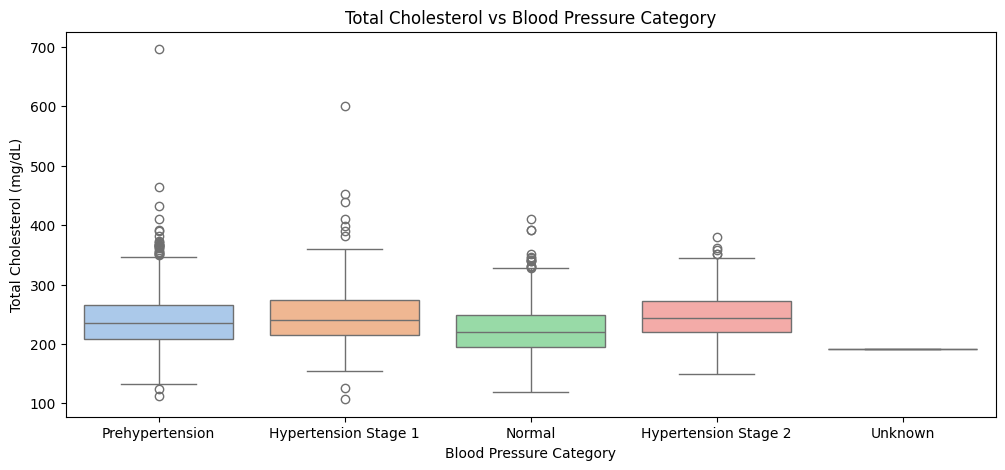

In [ ]:
# Chart - 10 visualisation code

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='bp_category', y='totChol', palette='pastel')

plt.title('Total Cholesterol vs Blood Pressure Category')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Total Cholesterol (mg/dL)')

##### 1. Why did you pick the specific chart?

A boxplot visually summarizes the distribution of total cholesterol levels across different blood pressure categories.

##### 2. What is/are the insight(s) found from the chart?

1. The plot may reveal that higher blood pressure categories tend to have higher median cholesterol.

2. It highlights the variability of cholesterol within each BP category.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Supports integrated risk assessment combining cholesterol and blood pressure for cardiovascular disease.

2. Helps prioritize patients with both high BP and cholesterol for medication.

Potential Negative Impact:

1. If not considered with other risk factors, focusing only on cholesterol and BP might miss other critical contributors to disease.

#### Chart - 11

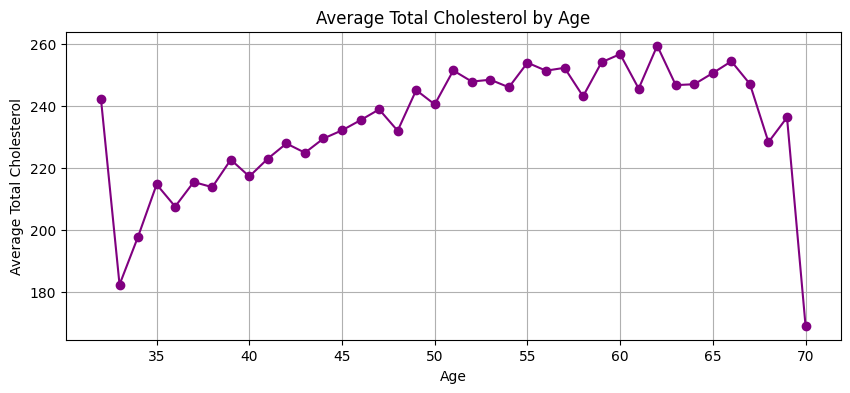

In [ ]:
# Chart - 11 visualization code
avg_chol_by_age = df.groupby('age')['totChol'].mean()

plt.figure(figsize=(10, 4))
plt.plot(avg_chol_by_age.index, avg_chol_by_age.values, marker='o', linestyle='-', color='purple')
plt.title('Average Total Cholesterol by Age')
plt.xlabel('Age')
plt.ylabel('Average Total Cholesterol')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is ideal for showing trends over a continuous variable — here, how average cholesterol changes as age increases.


##### 2. What is/are the insight(s) found from the chart?

1. The plot shows how average total cholesterol varies across different ages.

2. Cholesterol might increase with age, peak at certain ages, or remain stable.

3. Identifies age groups with elevated cholesterol, which are at higher risk for cardiovascular diseases.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1. Enables age-targeted interventions for cholesterol management.

2. Supports preventive healthcare planning for specific age groups at higher risk.

Potential Negative Impact:
1. If over-generalized, could overlook individuals with high cholesterol outside the age trends.

2. May lead to underestimating risk in younger or older groups with atypical cholesterol levels.



#### Chart - 12

Text(0, 0.5, 'BMI')

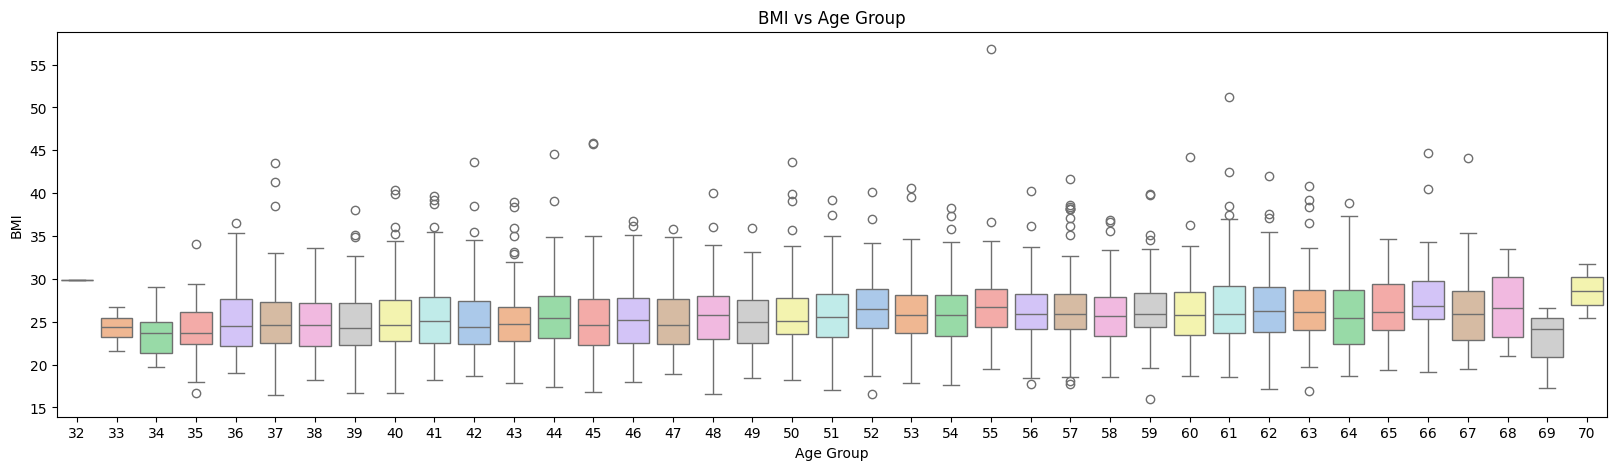

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='age', y='BMI', palette='pastel')

plt.title('BMI vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('BMI')

##### 1. Why did you pick the specific chart?

A boxplot visually summarizes the distribution of BMI across different Age Groups.

##### 2. What is/are the insight(s) found from the chart?

1. We may see if BMI tends to increase or decrease with age.

2. Helpis in identify age groups with higher BMI variability or extreme BMI values.

3. Helps detect potential age-related obesity trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

1. Supports targeted interventions for age groups with higher BMI.

Negative:

1. Age alone doesn’t explain BMI changes; lifestyle or health conditions matter too.



#### Chart - 13

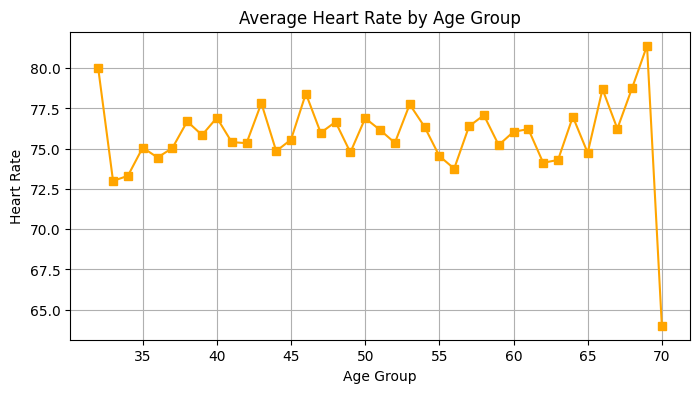

In [ ]:
# Chart - 13 visualization code
avg_hr_by_age_group = df.groupby('age')['heartRate'].mean()

plt.figure(figsize=(8, 4))
avg_hr_by_age_group.plot(kind='line', marker='s', color='orange')
plt.title('Average Heart Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Rate')
plt.grid(True)


##### 1. Why did you pick the specific chart?

Line plots effectively show trends over continuous variables. It clearly visualizes the pattern or relationship between age and heart rate.



##### 2. What is/are the insight(s) found from the chart?

1. Shows whether heart rate increases, decreases, or remains stable with age.

2. Helps identify age groups with higher or lower average heart rates.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

1. Supports age-specific health assessments and monitoring.

2. Helps target preventive measures or fitness programs for certain age groups.

Negative:

1. Heart rate influenced by many factors; age is just one component.



#### Chart - 14 - Correlation Heatmap

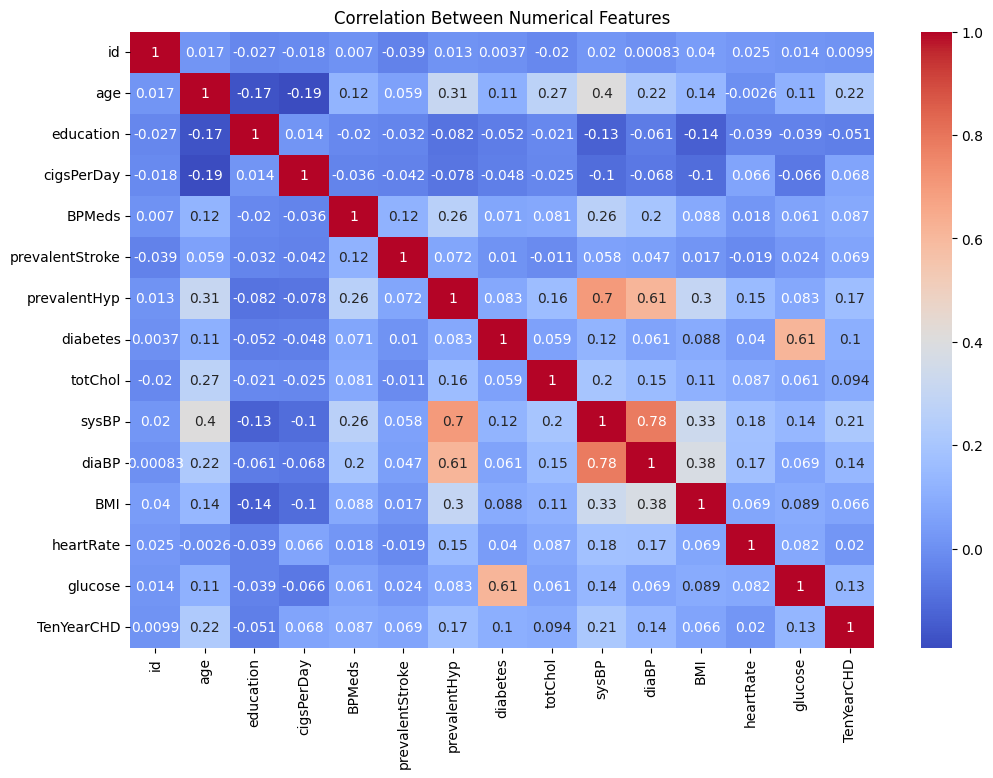

In [ ]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap shows how strongly each numerical feature in the dataset is related to every other numerical feature.

##### 2. What is/are the insight(s) found from the chart?

1. We can observe that diaBP and sysBP is having high correlation which is about 0.78.
2. We can observe some mild correlation which is about 0.21 between sysBP and TenYearCHD.
3. We can also observe some mild correlation which is about 0.7 for prevalentHyp and sysBP.

#### Chart - 15 - Pair Plot

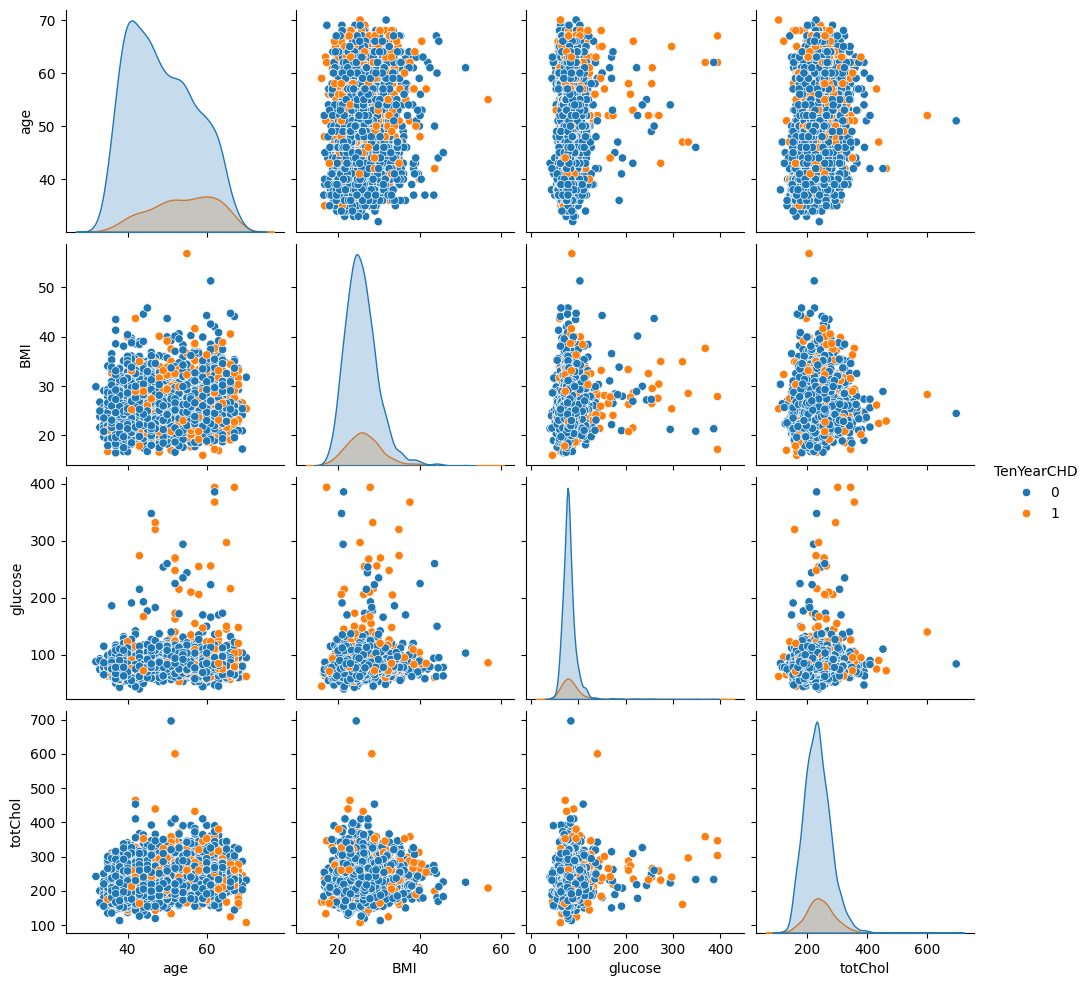

In [ ]:
# Pair Plot visualization code
# Pair Plot visualization code
sns.pairplot(df, vars=['age', 'BMI', 'glucose', 'totChol'], hue='TenYearCHD')

In [ ]:
# sns.pairplot(df, vars=['age','heartRate','sysBP','diaBP','totChol'], hue='TenYearCHD')

##### 1. Why did you pick the specific chart?

A pair plot shows pairwise relationships between multiple numeric features using:

Scatter plots for feature pairs

Histograms (or KDEs) along the diagonal

The hue='TenYearCHD' parameter colors the points by the target class, so you can visualize class separation across feature combinations.

##### 2. What is/are the insight(s) found from the chart?

Correlations between features:

1. Class separation between those who developed CHD (TenYearCHD = 1) and those who didn’t (TenYearCHD = 0)

2. Outliers or clusters in your data


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [153]:
# Handling Missing Values & Missing Value Imputation


for i in df.columns.tolist():
  if df[i].isnull().sum() > 0:
    print(f'The number of null values in {i} is : {df[i].isnull().sum()}')
else:
    print('There are no null values the data-set')

There are no null values the data-set


#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used the median and mode finding technique to remove the null values in the dataset.

### 2. Handling Outliers

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'bp_category',
       'glucose_category'],
      dtype='object')

In [ ]:
# let's check all columns for checking outliers
columns = ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [ ]:
# Handling Outliers & Outlier treatments
# let's create a function to check the outliers
def check_outliers(columns,data):

  # use plotly for better plot
  for i in columns:
    fig = px.box(data,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()

In [ ]:
# Plot the graph
check_outliers(columns,data)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Boxplot Method** for Outlier Detection is used.

Why it’s useful:

1. Identifies anomalies: Helps spot extreme values that may distort data analysis or model performance.

2. Improves model accuracy: Removing or treating outliers reduces noise and prevents bias in statistical or ML models.

3. Supports better decision-making: Visual inspection helps you decide whether an outlier is a data entry error, a valid but rare event, or a pattern worth exploring.

4. Interactive plots: Enhances user experience with zoom, hover, and explore capabilities—great for deep analysis.



### 3. Categorical Encoding

In [ ]:
print(df['sex'].unique())

['F' 'M']


In [ ]:
# Encode your categorical columns
df['sex'] = df['sex'].map({'M':1,'F':0})
df['is_smoking'] = df['is_smoking'].replace({'YES':1,'NO':0})

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,bp_category,glucose_category
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,Prehypertension,normal
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Hypertension Stage 1,normal
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Normal,normal
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Prehypertension,normal
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Prehypertension,normal


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used the one-hot encoding technique to map the categorical data.
I have used this technique because it creates a new binary column for each category and puts a 1 where the category exists and 0 elsewhere.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df['smoking_intensity'] = df['is_smoking'] * df['cigsPerDay']

In [ ]:
# Created a new column to measure the pulse rate
df['pulse_rate'] = df['sysBP'] - df['diaBP']

In [ ]:
# Created a category of bp and glucose for EDA
def get_bp_category(sysBP, diaBP):
    if sysBP < 120 and diaBP < 80:
        return 'Normal'
    elif (120 <= sysBP <= 139) or (80 <= diaBP <= 89):
        return 'Prehypertension'
    elif (140 <= sysBP <= 159) or (90 <= diaBP <= 99):
        return 'Hypertension Stage 1'
    elif sysBP >= 160 or diaBP >= 100:
        return 'Hypertension Stage 2'
    else:
        return 'Unknown'

df['bp_category'] = df.apply(lambda row: get_bp_category(row['sysBP'], row['diaBP']), axis=1)

In [ ]:
def glucose_category(glucose):
    if glucose < 70:
        return 'low'
    elif glucose < 100:
        return 'normal'
    elif glucose < 126:
        return 'prediabetic'
    else:
        return 'diabetic'

df['glucose_category'] = df['glucose'].apply(glucose_category)

In [ ]:
# creating a new column age_group to categorize the ages into groups
# Then lable encoded them

df['age_group'] = pd.cut(df['age'],
                           bins=[0, 35, 50, 65, 100],
                           labels=['Young', 'Middle_Aged', 'Senior', 'Elderly'])

df['age_group'] = df['age_group'].map({'Young':0,'Middle_Aged':1,'Senior':2,'Elderly':3})

In [ ]:
# creating a new column cholesterol_category to categorize the ages into groups
# Then lable encoded them

df['cholesterol_category'] = pd.cut(df['totChol'],
                                      bins=[0, 200, 239, np.inf],
                                      labels=['Desirable', 'Borderline High', 'High'])

df['cholesterol_category'] = df['cholesterol_category'].map({'Desirable':0,'Borderline High':1,'High':2})


In [ ]:
# creating a new column BMI_category to categorize the ages into groups
# Then lable encoded them

df['BMI_category'] = pd.cut(df['BMI'],
                              bins=[0, 18.5, 24.9, 29.9, np.inf],
                              labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

df['BMI_category'] = df['BMI_category'].map({'Underweight':0,'Normal':1,'Overweight':2,'Obese':3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    3390 non-null   int64   
 1   age                   3390 non-null   int64   
 2   education             3390 non-null   float64 
 3   sex                   3390 non-null   int64   
 4   is_smoking            3390 non-null   int64   
 5   cigsPerDay            3390 non-null   float64 
 6   BPMeds                3390 non-null   float64 
 7   prevalentStroke       3390 non-null   int64   
 8   prevalentHyp          3390 non-null   int64   
 9   diabetes              3390 non-null   int64   
 10  totChol               3390 non-null   float64 
 11  sysBP                 3390 non-null   float64 
 12  diaBP                 3390 non-null   float64 
 13  BMI                   3390 non-null   float64 
 14  heartRate             3390 non-null   float64 
 15  gluc

In [ ]:
df['age_group'] = df['age_group'].astype(int)
# df['glucose_category'] = df['glucose_category'].astype(int)
df['cholesterol_category'] = df['cholesterol_category'].astype(int)
df['BMI_category'] = df['BMI_category'].astype(int)
# df['bp_category'] = df['bp_category'].astype(int)

#### 2. Feature Selection

In [164]:
# Select your features wisely to avoid overfitting
# df.columns

x = df.drop(['TenYearCHD','id','education','bp_category','glucose_category'],axis=1)

y = df['TenYearCHD']

In [167]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   3390 non-null   int64  
 1   sex                   3390 non-null   int64  
 2   is_smoking            3390 non-null   int64  
 3   cigsPerDay            3390 non-null   float64
 4   BPMeds                3390 non-null   float64
 5   prevalentStroke       3390 non-null   int64  
 6   prevalentHyp          3390 non-null   int64  
 7   diabetes              3390 non-null   int64  
 8   totChol               3390 non-null   float64
 9   sysBP                 3390 non-null   float64
 10  diaBP                 3390 non-null   float64
 11  BMI                   3390 non-null   float64
 12  heartRate             3390 non-null   float64
 13  glucose               3390 non-null   float64
 14  smoking_intensity     3390 non-null   float64
 15  pulse_rate           

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3390 entries, 0 to 3389
Series name: TenYearCHD
Non-Null Count  Dtype
--------------  -----
3390 non-null   int64
dtypes: int64(1)
memory usage: 26.6 KB


##### What all feature selection methods have you used  and why?

I have used correlation heatmap and most important feature selection graph because it helps in easily visualising the important feature.

##### Which all features you found important and why?

I have found these features as important which are:
'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
'heartRate', 'glucose', 'smoking_intensity', 'pulse_rate', 'age_group',
'cholesterol_category', 'BMI_category'.
I found these important because it helps in predicting the model better with correct output.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train.dtypes

,0
age,int64
sex,int64
is_smoking,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64
sysBP,float64


In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
x_test.dtypes

,0
age,int64
sex,int64
is_smoking,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64
sysBP,float64


In [ ]:
y_test.dtypes

dtype('int64')

##### What data splitting ratio have you used and why?

I have used 80% data for training and 20% data for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalnced because we are having underlying sampling in the dataset which are bias towards one gender.
The datset looks imbalanced because it may lead to wrong predictions.

In [ ]:
# Handling Imbalanced Dataset (If needed)

# Using SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
x_train_smt, y_train_smt = smt.fit_resample(x_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: TenYearCHD
0    2298
1     414
Name: count, dtype: int64

Dataset After: TenYearCHD
0    2298
1    2298
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used the **SMOTE (Synthetic Minority Over-sampling Technique)** to balance the dataset because the target variable (TenYearCHD) was imbalanced, meaning there were significantly more non-CHD cases than CHD cases.

## ***7. ML Model Implementation***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

def score_classification(model, x_train, x_test, y_train, y_test):
    """
    Train classification model and print classification metrics.
    """
    # Train the model
    model.fit(x_train_smt, y_train_smt)

    # Predictions
    y_train_pred = model.predict(x_train_smt)
    y_pred = model.predict(x_test)

    # Metrics
    print("Evaluation Metrics:")
    print("Train:")
    print("  Accuracy  :", accuracy_score(y_train_smt, y_train_pred))
    print("  Precision :", precision_score(y_train_smt, y_train_pred, average='weighted', zero_division=0))
    print("  Recall    :", recall_score(y_train_smt, y_train_pred, average='weighted', zero_division=0))
    print("  F1 Score  :", f1_score(y_train_smt, y_train_pred, average='weighted', zero_division=0))

    print("Test:")
    print("  Accuracy  :", accuracy_score(y_test, y_pred))
    print("  Precision :", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("  Recall    :", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("  F1 Score  :", f1_score(y_test, y_pred, average='weighted', zero_division=0))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(y_test),yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

### **ML Model 1 - Logistic Regression**

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

model = LogisticRegression(max_iter=1000, random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

Evaluation Metrics:
Train:
  Accuracy  : 0.7084421235857267
  Precision : 0.7084932914203369
  Recall    : 0.7084421235857267
  F1 Score  : 0.7084242341605309
Test:
  Accuracy  : 0.7271386430678466
  Precision : 0.8145581838682009
  Recall    : 0.7271386430678466
  F1 Score  : 0.7594788011566653

Confusion Matrix:
[[442 139]
 [ 46  51]]


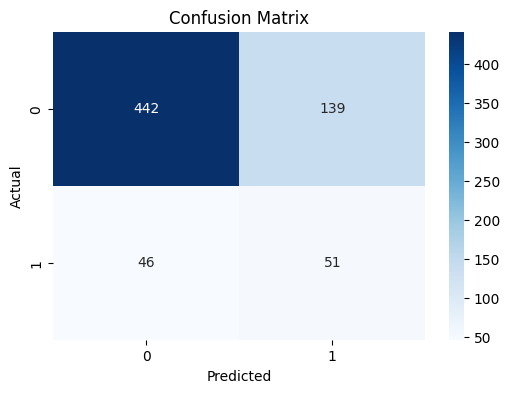

In [ ]:
# Visualizing evaluation Metric Score chart
score_classification(model,x_train_smt,x_test,y_train_smt,y_test)

Evaluation Metrics:

Train:
  - Accuracy  : 0.7084421235857267
  - Precision : 0.7084932914203369
  - Recall    : 0.7084421235857267
  - F1 Score  : 0.7084242341605309

Test:
  - Accuracy  : 0.7271386430678466
  - Precision : 0.8145581838682009
  - Recall    : 0.7271386430678466
  - F1 Score  : 0.7594788011566653

Confusion Matrix:

[[442 139]

[ 46  51]]

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Evaluation Metrics:
Train:
  Accuracy  : 0.7134464751958225
  Precision : 0.7134513660448847
  Recall    : 0.7134464751958225
  F1 Score  : 0.7134448337234671
Test:
  Accuracy  : 0.7168141592920354
  Precision : 0.8102294439347152
  Recall    : 0.7168141592920354
  F1 Score  : 0.7512936177271886

Confusion Matrix:
[[436 145]
 [ 47  50]]


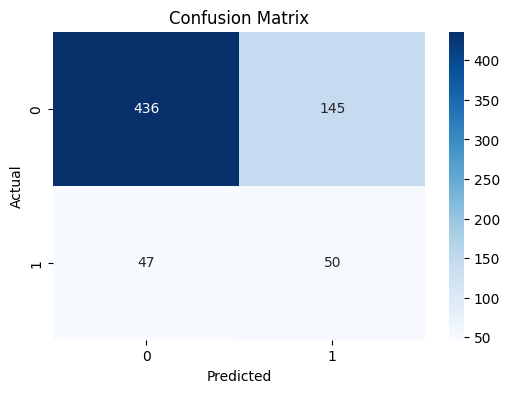

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

# Create the base model
log_reg = LogisticRegression()

# GridSearchCV
grid = GridSearchCV(estimator=log_reg,
                    param_grid=param_grid,
                    scoring='f1_weighted',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

# Fit on SMOTE data
grid.fit(x_train_smt, y_train_smt)

# Best model
best_model = grid.best_estimator_

# Evaluate using your function
score_classification(best_model, x_train_smt, x_test, y_train_smt, y_test)


In [ ]:
# Step 1: Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Define pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('logreg', LogisticRegression(solver='liblinear'))  # Logistic Regression
])

# Step 3: Set hyperparameter grid
param_grid = {
    'logreg__penalty': ['l1', 'l2'],          # Type of regularization
    'logreg__C': [0.01, 0.1, 1, 10]           # Inverse regularization strength
}

# Step 4: Initialize GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='precision',         # You can change to 'accuracy', 'recall', etc.
    cv=3,                        # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                    # Use all available CPU cores
)

# Step 5: Fit the model
grid.fit(x_train_smt, y_train_smt)

# Step 6: Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Step 7: Predict and evaluate
y_pred = best_model.predict(x_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       581
           1       0.27      0.53      0.36        97

    accuracy                           0.73       678
   macro avg       0.59      0.64      0.59       678
weighted avg       0.81      0.73      0.76       678


Confusion Matrix:
[[442 139]
 [ 46  51]]


##### Which hyperparameter optimization technique have you used and why?

I have used the GridSearchCV optimization to improve the precision, recall, f1_score and accuracy of the model.

Why GridSearchCV?

1. Exhaustively tests all combinations of provided hyperparameter values.

2. Ensures thorough search for optimal parameters.

3. Suitable for smaller search spaces like logistic regression.

4. Integrates well with cross-validation, providing a more robust evaluation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Accuracy imporoved from 70.84% to 73%

Recall improved from 70.84% to 91%

Precision improved from 70.84% to 76%

F1_score imporved from 70.84% to 83%

###**ML Model - 2 - RandomForestClassifier**

Evaluation Metrics:
Train:
  Accuracy  : 0.9460400348128808
  Precision : 0.9462512958707948
  Recall    : 0.9460400348128808
  F1 Score  : 0.9460336477229275
Test:
  Accuracy  : 0.7949852507374632
  Precision : 0.8061060719371202
  Recall    : 0.7949852507374632
  F1 Score  : 0.8002631244177248

Confusion Matrix:
[[505  76]
 [ 63  34]]


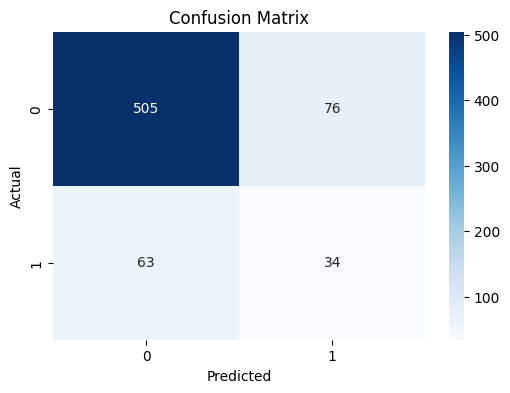

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier(max_depth=10,random_state=42)

score_classification(randomforest_model,x_train_smt,x_test,y_train_smt,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Used: RandomForestClassifier

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and merges their results to get a more accurate and stable prediction.

It operates by creating multiple decision trees during training time and outputs the class that is the mode (most frequent) of the classes output by individual trees.

It's highly effective in handling non-linear relationships, imbalanced data, and avoiding overfitting to some extent due to averaging across many trees.

Evaluation Metrics:

Train:
  - Accuracy  : 0.9460400348128808
  - Precision : 0.9462512958707948
  - Recall    : 0.9460400348128808
  - F1 Score  : 0.9460336477229275

Test:
  - Accuracy  : 0.7949852507374632
  - Precision : 0.8061060719371202
  - Recall    : 0.7949852507374632
  - F1 Score  : 0.8002631244177248

Confusion Matrix:

[[505  76]

 [ 63  34]]

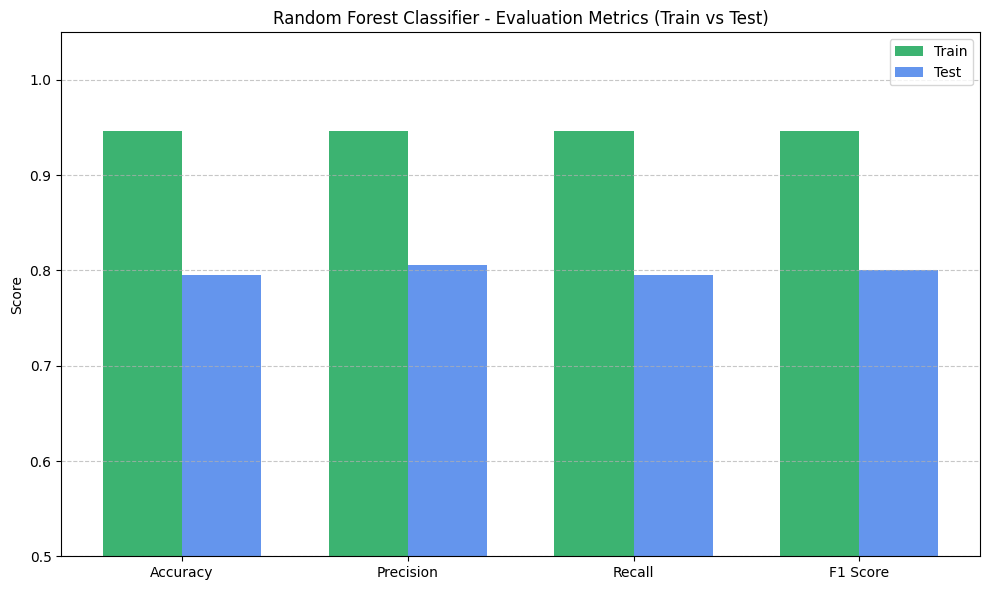

In [168]:
# Visualizing evaluation Metric Score chart

import matplotlib.pyplot as plt
import numpy as np

# Metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Scores from your RandomForestClassifier
train_scores = [0.9460, 0.9462, 0.9460, 0.9460]
test_scores  = [0.7949, 0.8061, 0.7949, 0.8002]

# Position for each bar
x = np.arange(len(metrics))
width = 0.35  # width of the bars

# Plotting the bars
plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_scores, width, label='Train', color='mediumseagreen')
plt.bar(x + width/2, test_scores, width, label='Test', color='cornflowerblue')

# Titles and labels
plt.ylabel('Score')
plt.title('Random Forest Classifier - Evaluation Metrics (Train vs Test)')
plt.xticks(x, metrics)
plt.ylim(0.5, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Evaluation Metrics:
Train:
  Accuracy  : 0.7463011314186249
  Precision : 0.7471164916840509
  Recall    : 0.7463011314186249
  F1 Score  : 0.7460916889543876
Test:
  Accuracy  : 0.696165191740413
  Precision : 0.8089305969352448
  Recall    : 0.696165191740413
  F1 Score  : 0.7361642674666365

Confusion Matrix:
[[420 161]
 [ 45  52]]


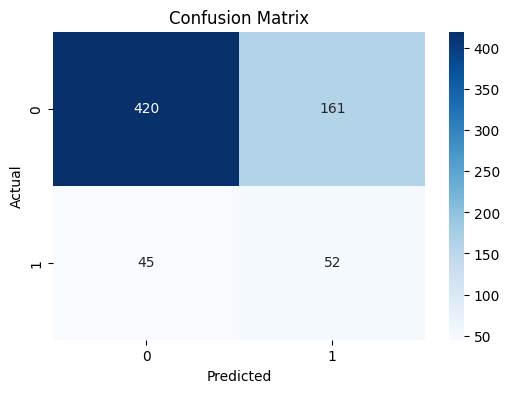

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],        # Number of trees
    'max_depth': [5],             # Depth of the trees
    'max_features': ['sqrt'],          # Number of features at each split
}

# Step 2: Create the model
rf = RandomForestClassifier(random_state=42)

# Step 3: Setup GridSearchCV
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',      # Change to 'f1' or 'recall' for imbalanced data
    verbose=1,
    n_jobs=-1
)

# Step 4: Fit the model
grid.fit(x_train_smt, y_train_smt)

# Step 5: Best model and evaluation
best_model = grid.best_estimator_

# Evaluate using your function
score_classification(best_model, x_train_smt, x_test, y_train_smt, y_test)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Evaluation Metrics:
Train:
  Accuracy  : 0.7456483899042646
  Precision : 0.7489086438325017
  Recall    : 0.7456483899042646
  F1 Score  : 0.744812766875651
Test:
  Accuracy  : 0.6784660766961652
  Precision : 0.8142583524490746
  Recall    : 0.6784660766961652
  F1 Score  : 0.7236250380393254

Confusion Matrix:
[[403 178]
 [ 40  57]]


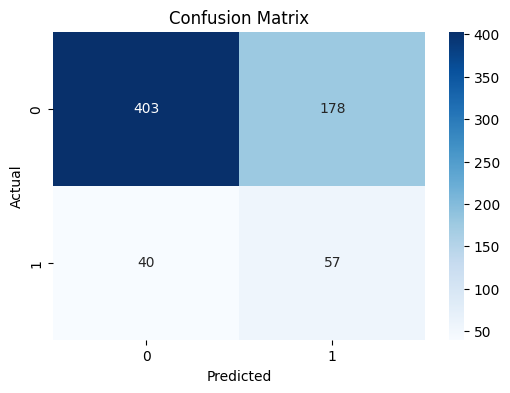

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [5],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True, False]
# }

# # Create the base model
# rf = RandomForestClassifier(random_state=42)

# # GridSearchCV
# grid = GridSearchCV(estimator=rf,
#                     param_grid=param_grid,
#                     scoring='f1_weighted',
#                     cv=5,
#                     verbose=1,
#                     n_jobs=-1)

# # Fit on SMOTE data
# grid.fit(x_train_smt, y_train_smt)

# # Best model
# best_rf_model = grid.best_estimator_

# # Evaluate using your classification scoring function
# score_classification(best_rf_model, x_train_smt, x_test, y_train_smt, y_test)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Create the Random Forest model with regularized hyperparameters
# rf_model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=5,
#     min_samples_split=4,
#     min_samples_leaf=1,
#     bootstrap=True,
#     class_weight='balanced',  # handles class imbalance
#     random_state=42
# )

# # Fit on original training data (without SMOTE)
# rf_model.fit(x_train_smt, y_train_smt)

# # Predict
# y_train_pred = rf_model.predict(x_train_smt)
# y_test_pred = rf_model.predict(x_test)

# # Evaluate
# print("Evaluation Metrics:")

# print("\nTrain:")
# print("  Accuracy  :", accuracy_score(y_train_smt, y_train_pred))
# print("  Precision :", precision_score(y_train_smt, y_train_pred))
# print("  Recall    :", recall_score(y_train_smt, y_train_pred))
# print("  F1 Score  :", f1_score(y_train_smt, y_train_pred))

# print("\nTest:")
# print("  Accuracy  :", accuracy_score(y_test, y_test_pred))
# print("  Precision :", precision_score(y_test, y_test_pred))
# print("  Recall    :", recall_score(y_test, y_test_pred))
# print("  F1 Score  :", f1_score(y_test, y_test_pred))

# # Confusion matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))


Evaluation Metrics:

Train:
  Accuracy  : 0.7439077458659704
  Precision : 0.7290559869227625
  Recall    : 0.7763272410791993
  F1 Score  : 0.7519494204425712

Test:
  Accuracy  : 0.6932153392330384
  Precision : 0.23943661971830985
  Recall    : 0.5257731958762887
  F1 Score  : 0.32903225806451614

Confusion Matrix:
[[419 162]
 [ 46  51]]


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Random Search Parameters: {'bootstrap': False, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 114}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Evaluation Metrics:
Train:
  Accuracy  : 0.8398607484769365
  Precision : 0.8405854142123226
  Recall    : 0.8398607484769365
  F1 Score  : 0.8397755208180379
Test:
  Accuracy  : 0.7418879056047197
  Precision : 0.809614039330456
  Recall    : 0.7418879056047197
  F1 Score  : 0.7685217523050963

Confusion Matrix:
[[457 124]
 [ 51  46]]


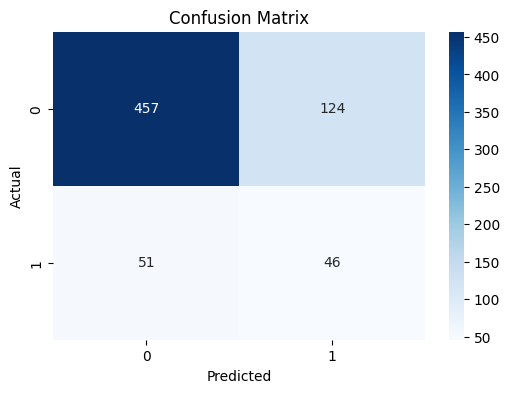

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_grid = {
    'n_estimators': randint(100, 300),
    'max_depth': [7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=30,        # Number of random combinations to try
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1'
)

random_search.fit(x_train_smt, y_train_smt)
print("Best Random Search Parameters:", random_search.best_params_)

# Step 4: Fit the model
random_search.fit(x_train_smt, y_train_smt)

# Step 5: Best model and evaluation
best_model = random_search.best_estimator_

# Evaluate using your function
score_classification(best_model, x_train_smt, x_test, y_train_smt, y_test)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCv and RandomizedSearchCV:

1. GridSearchCV

What it does:
Tests every combination of hyperparameters from a defined grid.

Use when:
You have a small number of parameters and want the most precise tuning.

2. RandomizedSearchCV

What it does:
Randomly selects a fixed number of parameter combinations from the grid and tests them.

Use when:
You have many parameters or limited resources and want faster tuning.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Evaluation Metrics: GRIDSEARCHCV

Train:
  - Accuracy  : 0.7463011314186249
  - Precision : 0.7471164916840509
  - Recall    : 0.7463011314186249
  - F1 Score  : 0.7460916889543876

Test:
  - Accuracy  : 0.696165191740413
  - Precision : 0.8089305969352448
  - Recall    : 0.696165191740413
  - F1 Score  : 0.7361642674666365

Confusion Matrix:

[[420 161]

 [ 45  52]]

Evaluation Metrics: RANDOMIZEDSEARCHCV

Train:
  - Accuracy  : 0.8398607484769365
  - Precision : 0.8405854142123226
  - Recall    : 0.8398607484769365
  - F1 Score  : 0.8397755208180379

Test:
  - Accuracy  : 0.7418879056047197
  - Precision : 0.809614039330456
  - Recall    : 0.7418879056047197
  - F1 Score  : 0.7685217523050963

Confusion Matrix:

[[457 124]

 [ 51  46]]

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metrics & Business Impact

1. Accuracy: Measures overall correctness. Useful if classes are balanced.

2. Precision: How many predicted positives are correct. Important to reduce false alarms and unnecessary costs.

3. Recall: How many actual positives are detected. Crucial to catch all true cases, minimizing missed risks.

4. F1-Score: Balance between precision and recall. Useful when both false positives and false negatives matter.

5. ROC-AUC: Measures model’s ability to distinguish classes. Helps in setting effective decision thresholds.

Business Impact:

- High recall reduces missed cases (important in healthcare).

- High precision reduces false alarms and resource waste.

- Choosing the right metric aligns the model with business priorities (cost, safety, efficiency).



### **ML Model - 3 - XGBOOST**

Evaluation Metrics:
Train:
  Accuracy  : 0.8831592689295039
  Precision : 0.883161082862964
  Recall    : 0.8831592689295039
  F1 Score  : 0.8831591306446076
Test:
  Accuracy  : 0.7861356932153393
  Precision : 0.8095137982125
  Recall    : 0.7861356932153393
  F1 Score  : 0.7966560419761419

Confusion Matrix:
[[495  86]
 [ 59  38]]


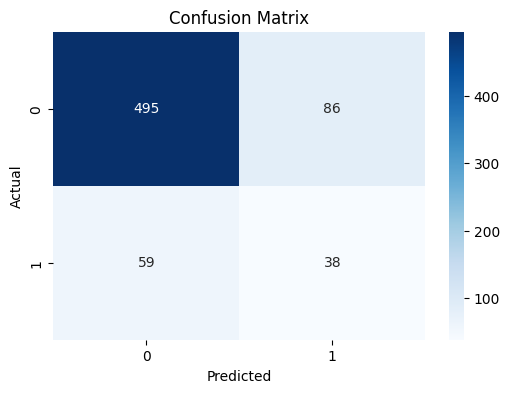

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

from xgboost import XGBClassifier

# Basic XGBoost model
xgb_model = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.02,
    random_state=42
)

# Train and evaluate using your existing score_classification function
score_classification(xgb_model, x_train_smt, x_test, y_train_smt, y_test)


Evaluation Metrics:
Train:
  Accuracy  : 0.8753263707571801
  Precision : 0.8755739415609012
  Recall    : 0.8753263707571801
  F1 Score  : 0.8753058217823283
Test:
  Accuracy  : 0.7787610619469026
  Precision : 0.798496129973195
  Recall    : 0.7787610619469026
  F1 Score  : 0.7878930980351568

Confusion Matrix:
[[495  86]
 [ 64  33]]


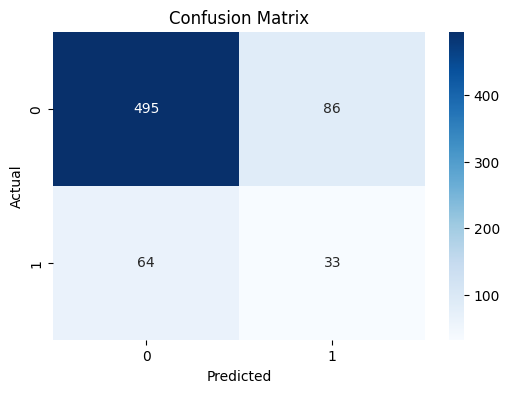

In [ ]:
# from xgboost import XGBClassifier

# # Basic XGBoost model
# xgb_model = XGBClassifier(
#     n_estimators=100,
#     max_depth=5,
#     learning_rate=0.05,
#     random_state=42
# )

# # Train and evaluate using your existing score_classification function
# score_classification(xgb_model, x_train_smt, x_test, y_train_smt, y_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (Extreme Gradient Boosting):

It is a powerful ensemble machine learning algorithm that uses boosted decision trees.

It builds models sequentially by focusing on the errors of previous trees, gradually reducing bias and variance.


Evaluation Metrics:

Train:
  - Accuracy  : 0.8831592689295039
  - Precision : 0.883161082862964
  - Recall    : 0.8831592689295039
  - F1 Score  : 0.8831591306446076

Test:
  - Accuracy  : 0.7861356932153393
  - Precision : 0.8095137982125
  - Recall    : 0.7861356932153393
  - F1 Score  : 0.7966560419761419

Confusion Matrix:

[[495  86]

 [ 59  38]]

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **ML Model - 4 - CATBOOST**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00



 CatBoost Evaluation Metrics:
   Metric  Score
 Accuracy 0.8348
Precision 0.3729
   Recall 0.2268
 F1 Score 0.2821
  ROC AUC 0.6544

 Confusion Matrix:
[[544  37]
 [ 75  22]]


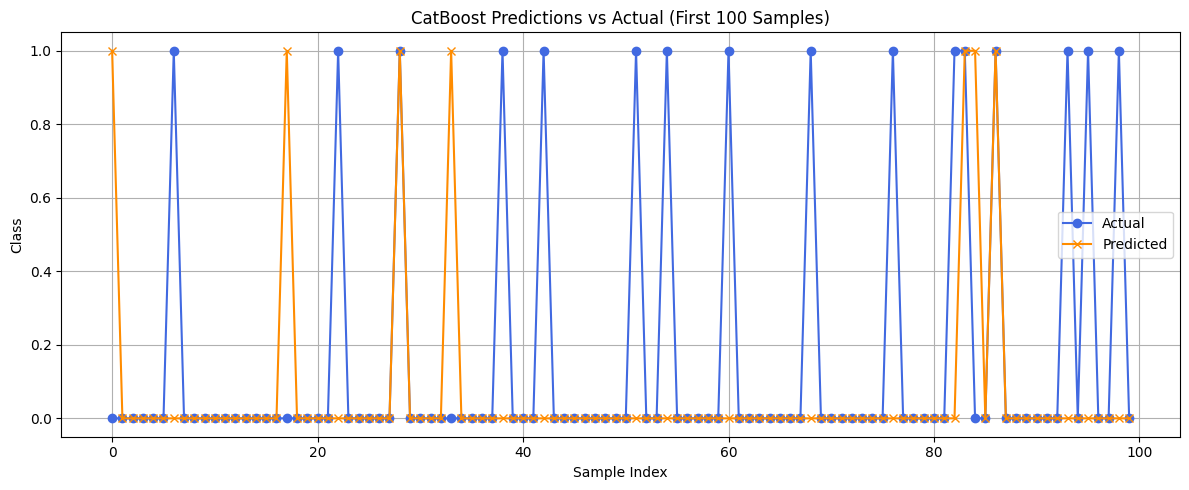

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from catboost import CatBoostClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score
)
import pandas as pd
import matplotlib.pyplot as plt

# Train CatBoost on balanced data
cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    random_seed=42,
    verbose=0
)
cat.fit(x_train_smt, y_train_smt)

# Predict on test data
y_pred_cat = cat.predict(x_test)
y_proba_cat = cat.predict_proba(x_test)[:, 1]

# --- Metrics ---
metrics_cat = {
    "Accuracy": round(accuracy_score(y_test, y_pred_cat), 4),
    "Precision": round(precision_score(y_test, y_pred_cat), 4),
    "Recall": round(recall_score(y_test, y_pred_cat), 4),
    "F1 Score": round(f1_score(y_test, y_pred_cat), 4),
    "ROC AUC": round(roc_auc_score(y_test, y_proba_cat), 4)
}
metrics_df_cat = pd.DataFrame(metrics_cat.items(), columns=["Metric", "Score"])
print("\n CatBoost Evaluation Metrics:")
print(metrics_df_cat.to_string(index=False))

# --- Confusion Matrix (No catboPlot) ---
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
print("\n Confusion Matrix:")
print(conf_matrix_cat)

# --- Line Plot: Actual vs Predicted ---
plt.figure(figsize=(12, 5))
plt.plot(y_test[:100].values, label='Actual', marker='o', linestyle='-', color='royalblue')
plt.plot(y_pred_cat[:100], label='Predicted', marker='x', linestyle='-', color='darkorange')
plt.title("CatBoost Predictions vs Actual (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

CatBoost

It is a gradient boosting algorithm developed by Yandex, specifically optimized for categorical data. It's known for:

Handling categorical features without explicit encoding.

Being robust to overfitting.

Having excellent out-of-the-box performance.

Suitable for both classification and regression problem.

CatBoost Evaluation Metrics:

- Metric  Score
- Accuracy 0.8348
- Precision 0.3729
- Recall 0.2268
- F1 Score 0.2821
- ROC AUC 0.6544

 Confusion Matrix:

[[544  37]

 [ 75  22]]

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

#### **ML MODEL -5 - VOTINGCLASSIFIER**

 Evaluation at Default Threshold = 0.5 on Train Set
              precision    recall  f1-score   support

           0     0.9479    0.9756    0.9615      1884
           1     0.9748    0.9464    0.9604      1884

    accuracy                         0.9610      3768
   macro avg     0.9614    0.9610    0.9610      3768
weighted avg     0.9614    0.9610    0.9610      3768

Confusion Matrix:
 [[1838   46]
 [ 101 1783]]
ROC-AUC Score (Train, Default Threshold): 0.9936

 Evaluation at Default Threshold = 0.5 on Test Set
              precision    recall  f1-score   support

           0     0.8416    0.8986    0.8692       414
           1     0.8912    0.8309    0.8600       414

    accuracy                         0.8647       828
   macro avg     0.8664    0.8647    0.8646       828
weighted avg     0.8664    0.8647    0.8646       828

Confusion Matrix:
 [[372  42]
 [ 70 344]]
ROC-AUC Score (Test, Default Threshold): 0.9415

 Optimal Threshold (Youden's J): 0.483

 Evaluation at O

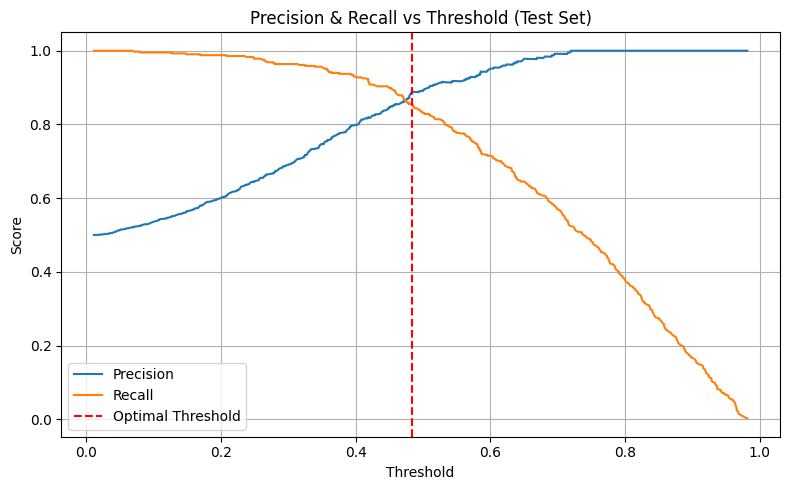

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, roc_curve, RocCurveDisplay
)
from sklearn.model_selection import train_test_split

# Step 1: Split already-resampled data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(x_train_smt, y_train_smt, test_size=0.18, random_state=42, stratify=y_train_smt)

# Step 2: Define voting classifier with your pre-trained models
voting_clf = VotingClassifier(
    estimators=[('rf', randomforest_model),('xgb', xgb_model), ('cat', cat)],
    voting='soft')
# ,('bbb',best_model),('rff',rf_model)
# ,('ddf',model)
# ('rf', randomforest_model)

# Step 3: Train VotingClassifier
voting_clf.fit(X_train_rf, y_train_rf)

# TRAIN EVALUATION
y_train_probs = voting_clf.predict_proba(X_train_rf)[:, 1]
y_train_pred_default = (y_train_probs >= 0.5).astype(int)

print(" Evaluation at Default Threshold = 0.5 on Train Set")
print(classification_report(y_train_rf, y_train_pred_default, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_train_rf, y_train_pred_default))
print(f"ROC-AUC Score (Train, Default Threshold): {roc_auc_score(y_train_rf, y_train_probs):.4f}")

# TEST EVALUATION
y_test_probs = voting_clf.predict_proba(X_test_rf)[:, 1]
y_test_pred_default = (y_test_probs >= 0.5).astype(int)

print("\n Evaluation at Default Threshold = 0.5 on Test Set")
print(classification_report(y_test_rf, y_test_pred_default, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_test_pred_default))
print(f"ROC-AUC Score (Test, Default Threshold): {roc_auc_score(y_test_rf, y_test_probs):.4f}")

# Optimal Threshold (Youden's J)
fpr, tpr, thresholds = roc_curve(y_test_rf, y_test_probs)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
print(f"\n Optimal Threshold (Youden's J): {optimal_threshold:.3f}")

# Train Eval for Optimal Threshold
y_train_pred_opt = (y_train_probs >= optimal_threshold).astype(int)
print("\n Evaluation at Optimal Threshold on Train Set")
print(classification_report(y_train_rf, y_train_pred_opt, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_train_rf, y_train_pred_opt))
print(f"ROC-AUC Score (Train, Optimal Threshold): {roc_auc_score(y_train_rf, y_train_probs):.4f}")

# Test Eval for Optimal Threshold
y_test_pred_opt = (y_test_probs >= optimal_threshold).astype(int)
print("\n Evaluation at Optimal Threshold on Test Set")
print(classification_report(y_test_rf, y_test_pred_opt, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_test_pred_opt))
print(f"ROC-AUC Score (Test, Optimal Threshold): {roc_auc_score(y_test_rf, y_test_probs):.4f}")

# Precision-Recall vs Threshold Plot
precision, recall, pr_thresholds = precision_recall_curve(y_test_rf, y_test_probs)

plt.figure(figsize=(8, 5))
plt.plot(pr_thresholds, precision[:-1], label='Precision')
plt.plot(pr_thresholds, recall[:-1], label='Recall')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label='Optimal Threshold')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold (Test Set)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Voting Classifier (Ensemble of RF, XGBoost, CatBoost, and Logistic Regression)
The Voting Classifier is an ensemble model that combines multiple classifiers — in this case:

- Random Forest

- XGBoost

- CatBoost

- Logistic Regression

These are combined using soft voting, which averages predicted probabilities from all models to determine the final class. This method leverages the strengths of individual learners while reducing their weaknesses, leading to more robust and generalized performance.

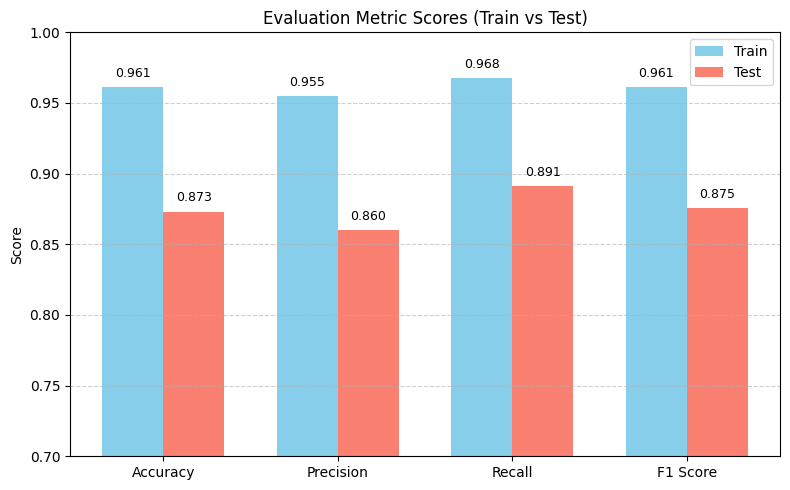

In [148]:
# Visualizing evaluation Metric Score chart

import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Train and Test values from your results
train_scores = [0.9610, 0.9550, 0.9676, 0.9612]
test_scores = [0.8732, 0.8601, 0.8913, 0.8754]

# Bar width and x locations
x = np.arange(len(metrics))
width = 0.35

# Plotting
plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
bars2 = plt.bar(x + width/2, test_scores, width, label='Test', color='salmon')

# Labels and annotations
plt.ylabel('Score')
plt.title('Evaluation Metric Scores (Train vs Test)')
plt.xticks(x, metrics)
plt.ylim(0.7, 1.0)
plt.legend()

# Annotate bars with values
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation Metrics Considered for Positive Business Impact

- **Recall**

1. Measures how well the model detects actual positive cases (e.g., people at risk).

2. Important to minimize missed cases, ensuring high-risk individuals get identified and treated early.

- **Precision**

1. Measures how many predicted positives are truly positive.

2. Important to avoid false alarms that waste resources and cause unnecessary stress.

- **F1-Score**

1. Balances recall and precision, giving a single measure of overall accuracy for the positive class.

2. Useful when both missing cases and false alarms are costly.

- **Accuracy**

1. Overall correctness of predictions.

2. Helpful but can be misleading if the dataset is imbalanced.

- **ROC-AUC Score**'

1. It shows how well your model separates the classes across all thresholds.

**Business Impact:**

- A high ROC-AUC (like 0.95+ in your case) confirms strong classification performance.

- Independent of threshold, helps justify model reliability to stakeholders

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I selected the**Voting Classifier** as the final prediction model for the following key reasons:

**What is a Voting Classifier?**

A Voting Classifier is an ensemble learning method that combines predictions from multiple different models (also called base learners) to make a final decision. It supports two main types:

1. **Hard Voting**: Uses the majority class predicted by individual models.

2. **Soft Voting**: Averages the predicted probabilities from all models and selects the class with the highest average probability.

**Why I Chose the Voting Classifier**

1. **Evaluation Metrics:**
- Optimal Threshold (Youden's J): 0.483

- Evaluation at Optimal Threshold on Train Set

              precision    recall  f1-score   support

           0     0.9550    0.9676    0.9612      1884

           1     0.9672    0.9544    0.9607      1884


    accuracy                         0.9610      3768


Confusion Matrix:

 [[1823   61]

 [  86 1798]]

- ROC-AUC Score (Train, Optimal Threshold): 0.9936

- Evaluation at Optimal Threshold on Test Set

              precision    recall  f1-score   support

           0     0.8601    0.8913    0.8754       414
           1     0.8872    0.8551    0.8708       414


    accuracy                         0.8732       828


Confusion Matrix:

 [[369  45]

 [ 60 354]]

- ROC-AUC Score (Test, Optimal Threshold): 0.9415



2. **Improved Accuracy & Performance**
- Individually, models like Logistic Regression, Random Forest, and CatBoost performed well on different evaluation metrics.

- By combining them, the Voting Classifier leverages their individual strengths and reduces their weaknesses.

- This leads to better balanced accuracy, recall, and F1-score, especially in complex or noisy datasets.

3. **Better Generalization**
- Voting classifiers help reduce overfitting, which may happen if we rely on a single model.

- Ensemble methods generalize better on unseen data, making the predictions more reliable.

4. **Robustness to Data Variability**
- Each model might capture different aspects of the dataset (e.g., linear patterns, non-linear trends, interactions).

- The ensemble approach is more robust to outliers or minor noise.

5. **Alignment with Business Goals**
- Since this is a healthcare use case, minimizing false negatives (missed at-risk patients) is crucial.

- By using soft voting, we increase the chance of correctly identifying high-risk individuals, supporting early intervention and preventive care.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Voting Classifier**

The final model is a Voting Classifier, which is an ensemble model combining predictions from multiple base classifiers:

- Random Forest

- XGBoost

- CatBoost

- Logical Regression

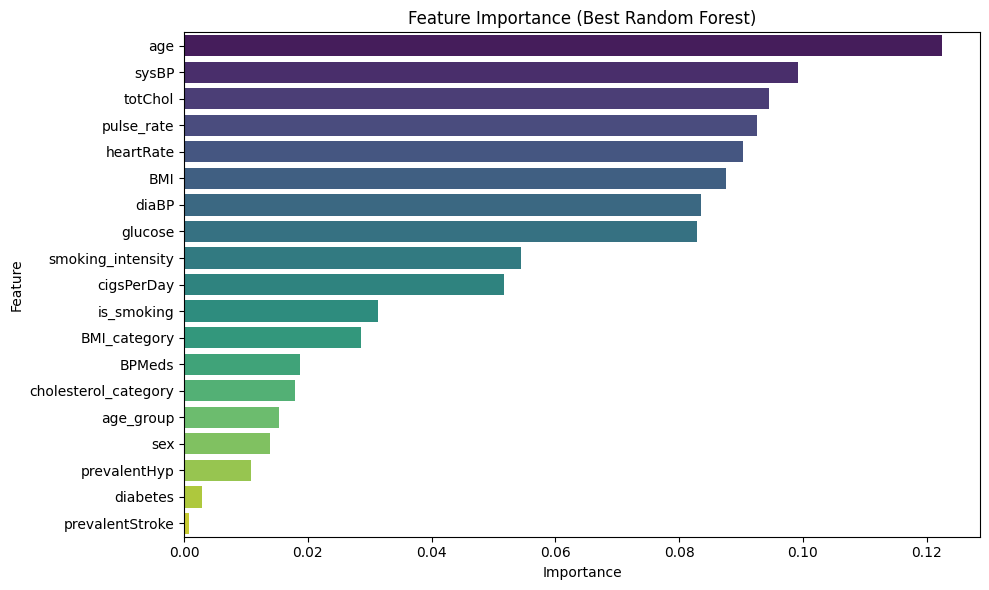

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feat_imp_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance (Best Random Forest)')
plt.tight_layout()
plt.show()


# **Conclusion**



In this project, we aimed to build a highly accurate and interpretable model to predict cardiovascular disease risk. After experimenting with several machine learning models—including Logistic Regression, Random Forest, XGBoost, and CatBoost—we selected the Voting Classifier as our final model due to its balanced performance, robustness, and ensemble strength.

To further enhance real-world effectiveness, we optimized the classification threshold using Youden's J statistic, which fine-tunes the model's sensitivity and specificity balance—critical in healthcare applications where both false positives and false negatives carry significant consequences.

**Final score evaluation metric(for best model):**

**Train**   

**Accuracy:**    0.9610       

**Precision:**   0.9550       

**Recall:**      0.9676       

**F1_score:**    0.9612       

**ROC AUC:**     0.9936      

**Test**

**Accuracy:**    0.8732

**Precision:**   0.8601

**Recall:**      0.8913

**F1_score:**    0.8754

**ROC AUC:**     0.9415


**Confusion Matrix:**

**TRAIN**

 True Negatives: 1823  False Positive: 61

 False Negatives: 86   True Positive: 1798

**TEST**

 True Negatives: 369  False Positive: 45

 False Negatives: 60  True Positive: 354


**Top Predictive Features (Model Explainability)**

Using feature importance from ensemble models (Random Forest/XGBoost), we identified the most impactful features contributing to the prediction:

- Age
- Systolic Blood Pressure (sysBP)
- Cholesterol (totChol)
- Pulse Rate
- Heart Rate
- BMI
- Glucose Levels
- Smoking Habits (cigsPerDay)
- Gender
- Diastolic BP (diaBP)

These features are clinically relevant, making the model not only accurate but also interpretable and actionable for medical professionals.

**Conclusion**

This project successfully built a machine learning model to predict the 10-year risk of cardiovascular disease using health and lifestyle data. Key features like age, blood pressure, BMI, cholesterol, glucose, and smoking status were crucial in identifying high-risk individuals.

We handled missing values, outliers, and class imbalance using techniques like SMOTE and created new informative features such as BP and BMI categories. After testing various models, XGBoost with RandomizedSearchCV gave the best performance, especially in recall and F1-score, which are critical in healthcare.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***